In [25]:
import numpy as np
import pandas as pd
import geopandas as gpd
import requests
from datetime import datetime
from datetime import timedelta
import csv
import matplotlib.pyplot as plt

import json
import numpy as np
import difflib
import plotly.express as px



# LOAD & Prepare DATA


Source 

https://djay.github.io/covidthailand/

For more informations  

https://github.com/djay/covidthailand/blob/main/downloads.md

## DateTime Scope

In [26]:
set_date_str = '2021-11-02'
date_back_10 = datetime.strptime(set_date_str, "%Y-%m-%d") - timedelta(days=10)
date_back_10 = date_back_10 .strftime("%Y-%m-%d")
set_date_str,date_back_10
# pd.to_datetime('2021-11-02')

('2021-11-02', '2021-10-23')

## Province & Population

In [27]:
prov_pop_df = pd.read_csv('Province_Pop_ref.csv')
province = prov_pop_df['Province'].tolist()
prov_tot_pop= dict(zip(prov_pop_df['Province'],prov_pop_df['Pop_incl_shadow']))
prov_607_pop= dict(zip(prov_pop_df['Province'],prov_pop_df['607_Pop']))
lvl = prov_pop_df[['Level','Province']].set_index('Province').iloc[:,0]
prov_pop_df 


,Province,Province_UPPER,Health_Area,Province_TH,Pop_incl_shadow,Over60_Pop,Risk_Pop,607_Pop,Level
0,Amnat Charoen,AMNAT CHAROEN,10,อำนาจเจริญ,379995,58559,29299,87858,2
1,Ang Thong,ANG THONG,4,อ่างทอง,292159,58554,30792,89346,1
2,Bangkok,BANGKOK,13,กรุงเทพมหานคร,7699175,1041828,1347294,2389122,4
3,Bueng Kan,BUENG KAN,8,บึงกาฬ,425427,56610,32647,89257,3
4,Buriram,BURIRAM,9,บุรีรัมย์,1587359,245503,100571,346074,2
...,...,...,...,...,...,...,...,...,...
72,Udon Thani,UDON THANI,8,อุดรธานี,1565740,229737,117585,347322,1
73,Uthai Thani,UTHAI THANI,3,อุทัยธานี,334270,63363,30166,93529,2
74,Uttaradit,UTTARADIT,2,อุตรดิตถ์,455259,93316,33112,126428,2
75,Yala,YALA,12,ยะลา,547993,61501,48169,109670,0


## Vaccination
Source : https://github.com/djay/covidthailand/wiki/vaccinations.csv

(Scrape from https://ddc.moph.go.th/vaccine-covid19/diaryReportMonth/)

In [28]:
djay_vacc_url =  'https://github.com/djay/covidthailand/wiki/vaccinations.csv'
df = pd.read_csv(djay_vacc_url)
print(df.columns)
df.tail(10)

Index(['Date', 'Province', 'Vac Allocated AstraZeneca',
       'Vac Allocated AstraZeneca 1', 'Vac Allocated AstraZeneca 2',
       'Vac Allocated Pfizer', 'Vac Allocated Sinopharm',
       'Vac Allocated Sinovac', 'Vac Allocated Sinovac 1',
       'Vac Allocated Sinovac 2', 'Vac Given 1 %', 'Vac Given 1 Cum',
       'Vac Given 2 %', 'Vac Given 2 Cum', 'Vac Given 3 %', 'Vac Given 3 Cum',
       'Vac Group Health Volunteer 1 Cum', 'Vac Group Health Volunteer 2 Cum',
       'Vac Group Health Volunteer 3 Cum', 'Vac Group Medical Staff 1 Cum',
       'Vac Group Medical Staff 2 Cum', 'Vac Group Medical Staff 3 Cum',
       'Vac Group Other Frontline Staff 1 Cum',
       'Vac Group Other Frontline Staff 2 Cum',
       'Vac Group Other Frontline Staff 3 Cum', 'Vac Group Over 60 1 Cum',
       'Vac Group Over 60 2 Cum', 'Vac Group Over 60 3 Cum',
       'Vac Group Risk: Disease 1 Cum', 'Vac Group Risk: Disease 2 Cum',
       'Vac Group Risk: Disease 3 Cum', 'Vac Group Risk: Location 1 Cum',
  

,Date,Province,Vac Allocated AstraZeneca,Vac Allocated AstraZeneca 1,Vac Allocated AstraZeneca 2,Vac Allocated Pfizer,Vac Allocated Sinopharm,Vac Allocated Sinovac,Vac Allocated Sinovac 1,Vac Allocated Sinovac 2,...,Vac Group Risk: Location 1 Cum,Vac Group Risk: Location 2 Cum,Vac Group Risk: Location 3 Cum,Vac Group Risk: Pregnant 1 Cum,Vac Group Risk: Pregnant 2 Cum,Vac Group Risk: Pregnant 3 Cum,Vac Group Student 1 Cum,Vac Group Student 2 Cum,Vac Group Student 3 Cum,Vac Population
12418,2021-11-04,Surin,450480.0,NaN,NaN,135180.0,31206.0,496320.0,NaN,NaN,...,288079.0,209144.0,3869.0,752.0,642.0,7.0,75632.0,21492.0,0.0,1392583.0
12419,2021-11-04,Tak,214560.0,NaN,NaN,41520.0,6722.0,260252.0,NaN,NaN,...,183925.0,120211.0,23784.0,747.0,524.0,38.0,16002.0,3049.0,0.0,589901.0
12420,2021-11-04,Trang,163320.0,NaN,NaN,97740.0,226096.0,217800.0,NaN,NaN,...,223907.0,151643.0,3739.0,839.0,584.0,5.0,41337.0,14777.0,0.0,659636.0
12421,2021-11-04,Trat,71220.0,NaN,NaN,17202.0,57374.0,116600.0,NaN,NaN,...,89973.0,64108.0,175.0,223.0,195.0,0.0,11294.0,5384.0,0.0,249458.0
12422,2021-11-04,Ubon Ratchathani,462570.0,NaN,NaN,107364.0,118866.0,718800.0,NaN,NaN,...,449263.0,282561.0,6019.0,1284.0,827.0,4.0,63523.0,18329.0,0.0,1880468.0
12423,2021-11-04,Udon Thani,394740.0,NaN,NaN,125220.0,262558.0,631560.0,NaN,NaN,...,359249.0,241340.0,1587.0,959.0,744.0,3.0,78081.0,29255.0,0.0,1565740.0
12424,2021-11-04,Uthai Thani,105560.0,NaN,NaN,23460.0,11008.0,147400.0,NaN,NaN,...,81619.0,68821.0,1573.0,190.0,159.0,3.0,18499.0,7354.0,0.0,334270.0
12425,2021-11-04,Uttaradit,183880.0,NaN,NaN,32520.0,14710.0,170840.0,NaN,NaN,...,123185.0,92181.0,1852.0,1002.0,728.0,5.0,20011.0,9683.0,0.0,455259.0
12426,2021-11-04,Yala,187700.0,NaN,NaN,190296.0,62984.0,130000.0,NaN,NaN,...,217901.0,153342.0,2388.0,1730.0,1103.0,1.0,14232.0,10351.0,0.0,547993.0
12427,2021-11-04,Yasothon,127880.0,NaN,NaN,30060.0,2428.0,198160.0,NaN,NaN,...,112902.0,76789.0,1802.0,220.0,153.0,4.0,24311.0,9255.0,0.0,535512.0


In [29]:
df['607_Full_Dose'] = df['Vac Group Over 60 2 Cum'] +  df['Vac Group Over 60 3 Cum'] +df['Vac Group Risk: Disease 2 Cum'] + df['Vac Group Risk: Disease 3 Cum'] 
df['Tot_Full_Dose'] = df['Vac Given 3 Cum'] + df['Vac Given 2 Cum']


df['607_Population'] = df['Province'].map(prov_607_pop)
df['Tot_Population'] = df['Province'].map(prov_tot_pop)

df['Percent_607_FD'] = df['607_Full_Dose']/df['607_Population']
df['Percent_Tot_FD'] = df['Tot_Full_Dose']/df['Tot_Population']

vac_df =  df[df.Date==set_date_str][['Province','Percent_Tot_FD','Percent_607_FD']]

vac_df.set_index('Province',inplace=True)
vac_df

,Percent_Tot_FD,Percent_607_FD
Province,,
Amnat Charoen,0.346276,0.485955
Ang Thong,0.365773,0.467005
Bangkok,0.906428,0.667126
Bueng Kan,0.276851,0.549996
Buriram,0.483130,0.585476
...,...,...
Udon Thani,0.371040,0.641998
Uthai Thani,0.413519,0.510676
Uttaradit,0.424835,0.538354


## Cases

Source : https://github.com/djay/covidthailand/wiki/moph_dashboard_prov.csv

(Scrape from https://ddc.moph.go.th/covid19-dashboard/?dashboard=province)

In [30]:
djay_cases_url ='https://github.com/djay/covidthailand/wiki/moph_dashboard_prov.csv'
df = pd.read_csv(djay_cases_url)
print(df.columns)
df.tail(10)

Index(['Date', 'Province', 'Cases', 'Cases Area Prison', 'Cases Imported',
       'Cases Proactive', 'Cases Walkin', 'Deaths', 'Hospitalized Severe',
       'Positive Rate Dash', 'Tests', 'Vac Given 1 Cum', 'Vac Given 2 Cum',
       'Vac Given 3 Cum'],
      dtype='object')


,Date,Province,Cases,Cases Area Prison,Cases Imported,Cases Proactive,Cases Walkin,Deaths,Hospitalized Severe,Positive Rate Dash,Tests,Vac Given 1 Cum,Vac Given 2 Cum,Vac Given 3 Cum
44505,2021-11-06,Surin,32.0,1.0,0.0,0.0,31.0,1.0,0.0,NaN,NaN,NaN,NaN,NaN
44506,2021-11-06,Tak,124.0,0.0,1.0,0.0,123.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN
44507,2021-11-06,Trang,185.0,0.0,0.0,0.0,185.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN
44508,2021-11-06,Trat,54.0,0.0,0.0,16.0,38.0,0.0,16.0,NaN,NaN,NaN,NaN,NaN
44509,2021-11-06,Ubon Ratchathani,71.0,0.0,0.0,0.0,71.0,1.0,0.0,NaN,NaN,NaN,NaN,NaN
44510,2021-11-06,Udon Thani,133.0,1.0,0.0,0.0,132.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN
44511,2021-11-06,Uthai Thani,3.0,0.0,0.0,0.0,3.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN
44512,2021-11-06,Uttaradit,8.0,0.0,0.0,0.0,8.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN
44513,2021-11-06,Yala,321.0,0.0,0.0,0.0,321.0,3.0,0.0,NaN,NaN,NaN,NaN,NaN
44514,2021-11-06,Yasothon,2.0,0.0,0.0,0.0,2.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN


In [31]:
df['Exclude_Cases'] = df['Cases Area Prison'] + df['Cases Imported']
df['Cal_Cases'] = df['Cases'] - df['Exclude_Cases']
df['Population'] = df['Province'].map(prov_tot_pop)
df['Rel_Cases'] = df['Cal_Cases']/ df['Population'] * 100000
df['Date'] = pd.to_datetime(df['Date']) 
df['Date_Minus'] = (pd.to_datetime(set_date_str) - df['Date']).dt.days
df

,Date,Province,Cases,Cases Area Prison,Cases Imported,Cases Proactive,Cases Walkin,Deaths,Hospitalized Severe,Positive Rate Dash,Tests,Vac Given 1 Cum,Vac Given 2 Cum,Vac Given 3 Cum,Exclude_Cases,Cal_Cases,Population,Rel_Cases,Date_Minus
0,2020-01-12,Bangkok,1.0,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7699175.0,NaN,660
1,2020-01-13,Bangkok,0.0,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7699175.0,NaN,659
2,2020-01-14,Bangkok,0.0,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7699175.0,NaN,658
3,2020-01-15,Bangkok,0.0,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7699175.0,NaN,657
4,2020-01-16,Bangkok,0.0,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7699175.0,NaN,656
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
44510,2021-11-06,Udon Thani,133.0,1.0,0.0,0.0,132.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,1.0,132.0,1565740.0,8.430518,-4
44511,2021-11-06,Uthai Thani,3.0,0.0,0.0,0.0,3.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,0.0,3.0,334270.0,0.897478,-4
44512,2021-11-06,Uttaradit,8.0,0.0,0.0,0.0,8.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,0.0,8.0,455259.0,1.757241,-4
44513,2021-11-06,Yala,321.0,0.0,0.0,0.0,321.0,3.0,0.0,NaN,NaN,NaN,NaN,NaN,0.0,321.0,547993.0,58.577391,-4


In [32]:
cases_df= df[(df.Date_Minus<7)&(df.Date_Minus>=0)][['Province','Date','Date_Minus','Rel_Cases','Cal_Cases']]
print(77*7)
cases_df

539


,Province,Date,Date_Minus,Rel_Cases,Cal_Cases
43668,Amnat Charoen,2021-10-27,6,0.263161,1.0
43669,Ang Thong,2021-10-27,6,6.503308,19.0
43670,Bangkok,2021-10-27,6,11.157040,859.0
43671,Bueng Kan,2021-10-27,6,0.705174,3.0
43672,Buriram,2021-10-27,6,1.385950,22.0
...,...,...,...,...,...
44202,Udon Thani,2021-11-02,0,6.706094,105.0
44203,Uthai Thani,2021-11-02,0,1.495797,5.0
44204,Uttaradit,2021-11-02,0,1.757241,8.0
44205,Yala,2021-11-02,0,33.759555,185.0


## 7 Day Avg Test Positive Rate

self scraping @ 2 November 2021
(Scrape from https://ddc.moph.go.th/covid19-dashboard/?dashboard=province)

In [33]:
# cases_df['Pop'] = cases_df['Province'].map(prov_tot_pop)
pos_test = pd.read_csv('Pos_Rate_2Nov21.csv')
pos_test.set_index('Province',inplace=True)
pos_test = pos_test.iloc[:,0]
pos_test 

Province
Bangkok             0.116044
Nonthaburi          0.113318
Pathum Thani        0.193667
Samut Prakan        0.166120
Samut Sakhon        0.089516
                      ...   
Udon Thani          0.050193
Uttaradit           0.065317
Uthai Thani         0.042333
Ubon Ratchathani    0.045308
Ang Thong           0.133794
Name: Rate, Length: 77, dtype: float64

# Explore Data

## 7 Day Case Average 

In [34]:
## 7 Day Case Average Absolute
case_7_avg = {}
for p in province:
    case_7_avg[p] = cases_df[(cases_df.Province==p)&(cases_df.Date_Minus<7)]['Cal_Cases'].mean()
case_7_avg['Bangkok'],case_7_avg['Chonburi']

(758.2857142857143, 323.0)

In [35]:
# Compare population
prov_tot_pop['Bangkok'],prov_tot_pop['Chonburi']

(7699175, 2047622)

In [36]:
## 7 Day Case Average Relative
case_7_avg = {}
for p in province:
    case_7_avg[p] = cases_df[(cases_df.Province==p)&(cases_df.Date_Minus<7)]['Rel_Cases'].mean()
case_7_avg['Bangkok'],case_7_avg['Chonburi']

(9.848921660901516, 15.774395860173412)

count    77.000000
mean     12.462738
std      13.940615
min       0.137957
25%       2.769776
50%       7.252044
75%      16.711419
max      69.077848
dtype: float64

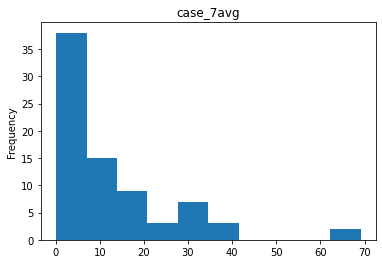

In [37]:
case_7avg = pd.Series(case_7_avg)
case_7avg.plot.hist(title='case_7avg')
case_7avg.describe()

## Total Vaccinated

count    77.000000
mean      0.422091
std       0.148300
min       0.259525
25%       0.341940
50%       0.387213
75%       0.449090
max       1.239706
Name: Percent_Tot_FD, dtype: float64

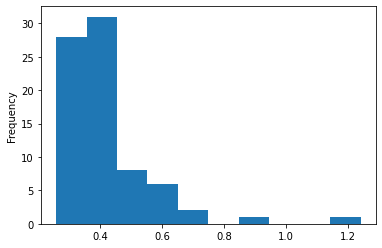

In [38]:
vac_df['Percent_Tot_FD'].plot.hist()
vac_df['Percent_Tot_FD'].describe()

In [39]:
vac_df[vac_df['Percent_Tot_FD'] >= 1]

,Percent_Tot_FD,Percent_607_FD
Province,,
Phuket,1.239706,0.942554


count    77.000000
mean      0.418978
std       0.132595
min       0.259525
25%       0.341940
50%       0.387213
75%       0.449090
max       1.000000
Name: Percent_Tot_FD, dtype: float64

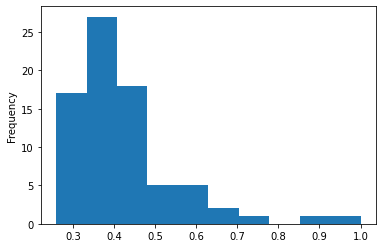

In [40]:
vac_df['Percent_Tot_FD'] = vac_df['Percent_Tot_FD'].apply(lambda x: 1 if x>1 else x)
vac_df['Percent_Tot_FD'].plot.hist()
vac_df['Percent_Tot_FD'].describe()

## 607 Vaccinated

count    77.000000
mean      0.552713
std       0.101972
min       0.326883
25%       0.492141
50%       0.544612
75%       0.592926
max       0.942554
Name: Percent_607_FD, dtype: float64

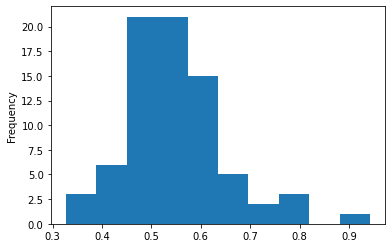

In [41]:
vac_df['Percent_607_FD'].plot.hist()
vac_df['Percent_607_FD'].describe()

## 7Avg Positive Rate

count    77.000000
mean      0.105768
std       0.093415
min       0.008799
25%       0.042333
50%       0.081958
75%       0.138189
max       0.539742
Name: Rate, dtype: float64

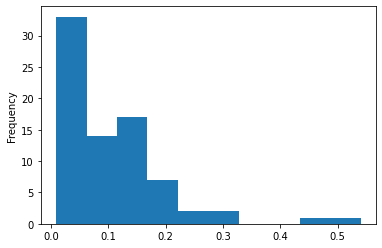

In [42]:
pos_test.plot.hist()
pos_test.describe()

# Combine & Explore Data

In [43]:
frame = { 'Avg_Case': case_7avg,'Avg_PosTest':pos_test, 'Tot_Vac': vac_df.Percent_Tot_FD, '607_Vac': vac_df.Percent_607_FD,'Level': lvl }
X = pd.DataFrame(frame).reset_index(drop=False).rename(columns= {'index':'Province'})
X

,Province,Avg_Case,Avg_PosTest,Tot_Vac,607_Vac,Level
0,Amnat Charoen,0.864673,0.013279,0.346276,0.485955,2
1,Ang Thong,6.209926,0.133794,0.365773,0.467005,1
2,Bangkok,9.848922,0.116044,0.906428,0.667126,4
3,Bueng Kan,1.141710,0.025926,0.276851,0.549996,3
4,Buriram,1.889932,0.024713,0.483130,0.585476,2
...,...,...,...,...,...,...
72,Udon Thani,7.572868,0.050193,0.371040,0.641998,1
73,Uthai Thani,1.239375,0.042333,0.413519,0.510676,2
74,Uttaradit,2.604483,0.065317,0.424835,0.538354,2
75,Yala,68.640084,0.167045,0.445009,0.448181,0


In [44]:
# Vaccine vs. Cases (with Level)
fig = px.scatter(X, x="Avg_Case", y="Tot_Vac",size='Avg_PosTest',hover_name='Province',color='Level',title='Tot Vaccine vs. Cases',color_continuous_scale='Turbo')
fig.show()

In [45]:
# Tot Vaccine vs. 607 Vaccine(with Level)
fig = px.scatter(X, x="Tot_Vac",y='607_Vac',size='Avg_PosTest',hover_name='Province',color='Level',title='Tot Vaccine vs. 607 Vaccine',color_continuous_scale='Turbo')
fig.show()

In [46]:
# 3D Plot
fig = px.scatter_3d(X, x="Avg_Case", y="Tot_Vac",z='607_Vac',size='Avg_PosTest',hover_name='Province',color='Level',title='3D Scatter Plot',color_continuous_scale='Turbo')
fig.show()

# Model 0 : Government Criteria

หลักเกณฑ์พิจารณาพื้นที่นำร่องท่องเที่ยว (ความพร้อมด้านสถานการณ์) **สำหรับพื้นที่นำร่องท่องเที่ยว

ความครอบคลุมวัคซีนระดับจังหวัดอย่างน้อย 50% และกลุ่ม 608 (ผู้สูงอายุ ผู้มีโรคประจำตัว 7 กลุ่มโรค และหญิงตั้งครรภ์) อย่างน้อย 80%

มีศักยภาพรองรับผู้ป่วยอย่างเพียงพอ โดยดูตัวชี้วัด อัตราครองเตียงผู้ป่วยเหลืองแดงไม่เกิน 80% ** Limited Data Not satisfy 

มีการเฝ้าระวังกลุ่มเสี่ยงอย่างต่อเนื่อง โดยมีผู้ติดเชื้อไม่เกิน 5-10 รายต่อแสนประชากรต่อวัน (ใช้ค่าเฉลี่ยรายสัปดาห์)

translation:

7 Day Case Avg. < 5

Total Vaccinated > 0.5

607 > 0.8

Sources: https://www.bangkokbiznews.com/news/962398 (27 Sept 2021)

In [47]:
def gov_criteria(avg_case,tot_vac,_607_vac):
    if (avg_case < 10) and (tot_vac>=0.5) and (_607_vac>=0.8):
        return True
    return False

Y = X.copy()
# Y = Y.merge(lvl.to_frame(), left_index=True, right_index=True)
Y['Level_4'] = Y.apply(lambda x: gov_criteria(x.Avg_Case,x.Tot_Vac,x['607_Vac']),axis=1 )
# lvl

Y[Y.Level_4]
# Y ['Gov'] = 

,Province,Avg_Case,Avg_PosTest,Tot_Vac,607_Vac,Level,Level_4


In [48]:
# 3D Plot
import plotly.graph_objects as go


# fig = px.scatter_3d(Y, x="Avg_Case", y="Tot_Vac",z='607_Vac',size='Avg_PosTest',hover_name='Province',color='Level',title='3D Scatter Plot',color_continuous_scale='Turbo')
fig = px.scatter(Y, x="Avg_Case",y="Tot_Vac",hover_name='Province',color='Level',title='Avg Case vs. Tot Vaccine',color_continuous_scale='Turbo')
fig.add_shape(type="rect",
    xref="x", yref="y",
    x0=0, y0=0.5, x1=10, y1=1,
    line=dict(
        color="Purple",
        width=3,
    ),
)
fig.update_layout(xaxis_range=[0,70])
fig.show()

In [49]:
fig = px.scatter(Y, x="Avg_Case",y="607_Vac",hover_name='Province',color='Level',title='Avg Case vs. 607 Vaccine',color_continuous_scale='Turbo')
fig.add_shape(type="rect",
    xref="x", yref="y",
    x0=0, y0=0.8, x1=10, y1=1,
    line=dict(
        color="Purple",
        width=3,
    ),
)
fig.update_layout(xaxis_range=[0,70])
fig.show()

# Model 1 : Unsupervised Learning

In [50]:
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA

## Normalize Data & Concat

In [84]:
Feat = X[['Avg_Case', 'Avg_PosTest', 'Tot_Vac', '607_Vac']]
Feat.head()

,Avg_Case,Avg_PosTest,Tot_Vac,607_Vac
0,0.864673,0.013279,0.346276,0.485955
1,6.209926,0.133794,0.365773,0.467005
2,9.848922,0.116044,0.906428,0.667126
3,1.141710,0.025926,0.276851,0.549996
4,1.889932,0.024713,0.483130,0.585476


In [85]:
Feat.describe()

,Avg_Case,Avg_PosTest,Tot_Vac,607_Vac
count,77.000000,77.000000,77.000000,77.000000
mean,12.462738,0.105768,0.418978,0.552713
std,13.940615,0.093415,0.132595,0.101972
min,0.137957,0.008799,0.259525,0.326883
25%,2.769776,0.042333,0.341940,0.492141
50%,7.252044,0.081958,0.387213,0.544612
75%,16.711419,0.138189,0.449090,0.592926
max,69.077848,0.539742,1.000000,0.942554


In [86]:
Feat['Avg_Case'] = Feat['Avg_Case'].div(100)
Feat['Avg_Case'].describe()

<ipython-input-86-59e213221904>:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



count    77.000000
mean      0.124627
std       0.139406
min       0.001380
25%       0.027698
50%       0.072520
75%       0.167114
max       0.690778
Name: Avg_Case, dtype: float64

C:\ProgramData\Anaconda3\lib\site-packages\pandas\plotting\_matplotlib\tools.py:331: MatplotlibDeprecationWarning:


The is_first_col function was deprecated in Matplotlib 3.4 and will be removed two minor releases later. Use ax.get_subplotspec().is_first_col() instead.



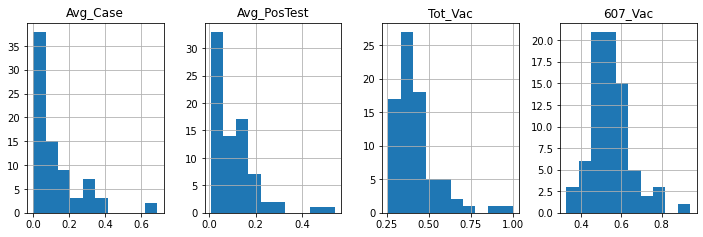

In [87]:
Feat.hist(layout=(1, 4), figsize=(3*4, 3.5));

## KMean clustering

### Find Optimized K

read more:  

https://lengyi.medium.com/%E0%B8%AB%E0%B8%B2%E0%B8%88%E0%B8%B3%E0%B8%99%E0%B8%A7%E0%B8%99-clusters-%E0%B8%97%E0%B8%B5%E0%B9%88%E0%B9%80%E0%B8%AB%E0%B8%A1%E0%B8%B2%E0%B8%B0%E0%B8%AA%E0%B8%A1%E0%B8%AA%E0%B8%B3%E0%B8%AB%E0%B8%A3%E0%B8%B1%E0%B8%9A-kmeans-clustering-%E0%B8%94%E0%B9%89%E0%B8%A7%E0%B8%A2-elbow-method-85421efe9d

https://medium.com/swlh/how-to-choose-the-right-number-of-clusters-in-the-k-means-algorithm-9160c57ec760

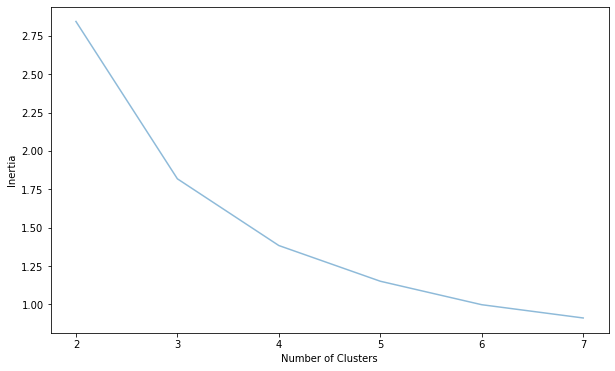

In [88]:
min_range = 2
max_range = 8

inertia = []
k_list = range(min_range, max_range)

for k in k_list:
    km = KMeans(n_clusters = k, random_state= 0)
    km.fit(Feat) 
    score = km.inertia_
    inertia.append(score)


plt.figure(1 , figsize = (10 ,6))
# plt.plot(np.arange(min_range , max_range) , inertia , 'o')
plt.plot(np.arange(min_range , max_range) , inertia , '-' , alpha = 0.5)

plt.xlabel('Number of Clusters') , plt.ylabel('Inertia')
plt.show()

### Train Model

In [89]:
km = KMeans(n_clusters=4, random_state=1234)
km.fit(Feat)
cluster = km.predict(Feat)
X["Cluster_1"] = cluster

### Result

In [90]:
X["Cluster_1"].value_counts()

0    45
3    19
1    10
2     3
Name: Cluster_1, dtype: int64

In [92]:
X.groupby("Cluster_1").mean()

,Avg_Case,Avg_PosTest,Tot_Vac,607_Vac,Level,PCA_0,PCA_1,Cluster_2
Cluster_1,,,,,,,,
0,4.362205,0.059411,0.359172,0.526592,1.711111,-0.473937,-0.083148,1
1,11.228510,0.136731,0.690631,0.713026,2.000000,1.562457,-0.033384,0
2,58.287370,0.382783,0.359523,0.397227,0.000000,-1.457789,0.572848,3
3,25.062334,0.155528,0.427035,0.554756,0.947368,0.530313,0.124050,2


C:\ProgramData\Anaconda3\lib\site-packages\pandas\plotting\_matplotlib\tools.py:331: MatplotlibDeprecationWarning:


The is_first_col function was deprecated in Matplotlib 3.4 and will be removed two minor releases later. Use ax.get_subplotspec().is_first_col() instead.



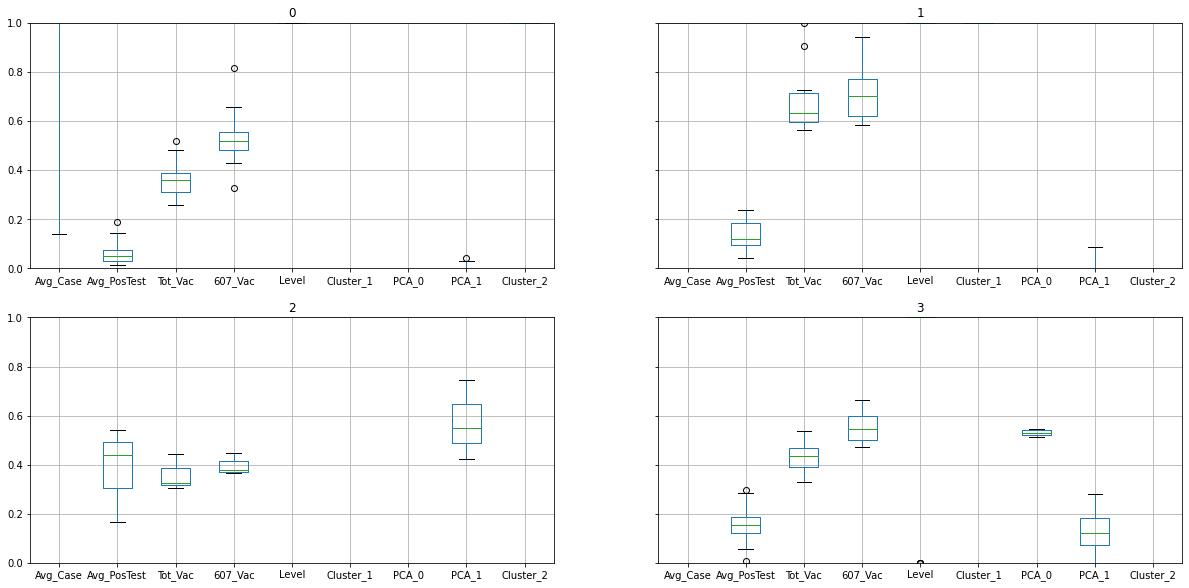

In [93]:
# Feat.groupby("Cluster").boxplot(figsize=(10,10)) 

axes = X.groupby("Cluster_1").boxplot(figsize=(20,10),  return_type='axes')
for ax in axes:
    ax.set_ylim(0, 1)

plt.show()
# .describe()

In [94]:
for i in range(4):
    print(i,X[X.Cluster_1==i].Province.tolist())

0 ['Amnat Charoen', 'Ang Thong', 'Bueng Kan', 'Buriram', 'Chai Nat', 'Chaiyaphum', 'Chiang Rai', 'Kalasin', 'Kamphaeng Phet', 'Khon Kaen', 'Lampang', 'Lamphun', 'Loei', 'Lopburi', 'Mae Hong Son', 'Maha Sarakham', 'Mukdahan', 'Nakhon Nayok', 'Nakhon Pathom', 'Nakhon Phanom', 'Nakhon Ratchasima', 'Nakhon Sawan', 'Nan', 'Nong Bua Lamphu', 'Nong Khai', 'Phayao', 'Phetchabun', 'Phichit', 'Phitsanulok', 'Phra Nakhon Si Ayutthaya', 'Phrae', 'Roi Et', 'Sa Kaeo', 'Sakon Nakhon', 'Samut Songkhram', 'Sing Buri', 'Sisaket', 'Sukhothai', 'Suphan Buri', 'Surin', 'Ubon Ratchathani', 'Udon Thani', 'Uthai Thani', 'Uttaradit', 'Yasothon']
1 ['Bangkok', 'Chachoengsao', 'Chonburi', 'Nonthaburi', 'Pathum Thani', 'Phang Nga', 'Phuket', 'Ranong', 'Samut Prakan', 'Samut Sakhon']
2 ['Narathiwat', 'Pattani', 'Yala']
3 ['Chanthaburi', 'Chiang Mai', 'Chumphon', 'Kanchanaburi', 'Krabi', 'Nakhon Si Thammarat', 'Phatthalung', 'Phetchaburi', 'Prachinburi', 'Prachuap Khiri Khan', 'Ratchaburi', 'Rayong', 'Saraburi', 'S

In [98]:
"""

1 : High Vaccine, Low Case        # 10  * Travelable     ['Bangkok', 'Chachoengsao', 'Chonburi', 'Nonthaburi', 'Pathum Thani', 'Phang Nga', 'Phuket', 'Ranong', 'Samut Prakan', 'Samut Sakhon'] 
    
0 : Medium Vaccine, Low Case      # 45     ['Amnat Charoen', 'Ang Thong', 'Bueng Kan', 'Buriram', 'Chai Nat', 'Chaiyaphum', 'Chiang Rai', 'Kalasin', 'Kamphaeng Phet', 
                                          'Khon Kaen', 'Lampang', 'Lamphun', 'Loei', 'Lopburi', 'Mae Hong Son', 'Maha Sarakham', 'Mukdahan', 'Nakhon Nayok', 'Nakhon Pathom',
                                           'Nakhon Phanom', 'Nakhon Ratchasima', 'Nakhon Sawan', 'Nan', 'Nong Bua Lamphu', 'Nong Khai', 'Phayao', 'Phetchabun', 'Phichit', 'Phitsanulok',
                                               'Phra Nakhon Si Ayutthaya', 'Phrae', 'Roi Et', 'Sa Kaeo', 'Sakon Nakhon', 
                                          'Samut Songkhram', 'Sing Buri', 'Sisaket', 'Sukhothai', 'Suphan Buri', 'Surin', 'Ubon Ratchathani', 'Udon Thani', 'Uthai Thani', 'Uttaradit', 'Yasothon']

3 : Medium Vaccine, Medium Case   # 19  *** Improve  ['Chanthaburi', 'Chiang Mai', 'Chumphon', 'Kanchanaburi', 'Krabi', 'Nakhon Si Thammarat', 'Phatthalung', 
                                              'Phetchaburi', 'Prachinburi', 'Prachuap Khiri Khan', 'Ratchaburi', 'Rayong', 'Saraburi', 'Satun', 'Songkhla', 'Surat Thani', 'Tak', 'Trang', 'Trat']

2 : Medium Vaccine, High Case     # 3   ** Avoid  ['Narathiwat', 'Pattani', 'Yala']     

By order of severity 3 < 1 < 2 < 0
"""
""

''

In [95]:
# 4 Feature (Avg_Case,Tot_Vac,607_Vac,Avg_PosTest)
fig = px.scatter_3d(X, x="Avg_Case", y="Tot_Vac",z='607_Vac',size='Avg_PosTest',hover_name='Province',color='Cluster_1',title='3D Scatter Plot',color_continuous_scale='Turbo',width=800, height=800)
fig.show()

## PCA

In [99]:
Feat 

,Avg_Case,Avg_PosTest,Tot_Vac,607_Vac
0,0.008647,0.013279,0.346276,0.485955
1,0.062099,0.133794,0.365773,0.467005
2,0.098489,0.116044,0.906428,0.667126
3,0.011417,0.025926,0.276851,0.549996
4,0.018899,0.024713,0.483130,0.585476
...,...,...,...,...
72,0.075729,0.050193,0.371040,0.641998
73,0.012394,0.042333,0.413519,0.510676
74,0.026045,0.065317,0.424835,0.538354
75,0.686401,0.167045,0.445009,0.448181


In [100]:

pca = PCA(n_components=2, random_state=4321)
pca.fit(Feat)
feat_pca = pca.transform(Feat)
# feat_pca

In [101]:
X ['PCA_0'] = feat_pca[:,0]
X ['PCA_1'] = feat_pca[:,1]

In [102]:
fig = px.scatter(X, x="PCA_0",y="PCA_1",hover_name='Province',color='Cluster_1',title='PCA_plot',color_continuous_scale='Turbo')
fig.show()
# 'PCA_0' : Case
# 'PCA_1' : Vaccine

## PCA x K-Mean

readmore :

https://medium.com/@tamagotchii/unsupervised-learning-clustering-and-pca-pokemon-dataset-botnoi-classroom-7f51c20ab78f

In [103]:
Feat = X [['PCA_0','PCA_1']]
Feat.head(5) 

,PCA_0,PCA_1
0,-0.173343,-0.013698
1,-0.073737,-0.060184
2,0.243492,0.397471
3,-0.187969,-0.028123
4,-0.076335,0.125571


In [104]:
Feat_scale = (Feat - Feat.min()) / (Feat.max()-Feat.min())
Feat_scale.describe()

,PCA_0,PCA_1
count,77.000000,77.000000
mean,0.268472,0.465881
std,0.222566,0.140550
min,0.000000,0.000000
25%,0.090154,0.413249
50%,0.191807,0.449634
75%,0.410412,0.513325
max,1.000000,1.000000


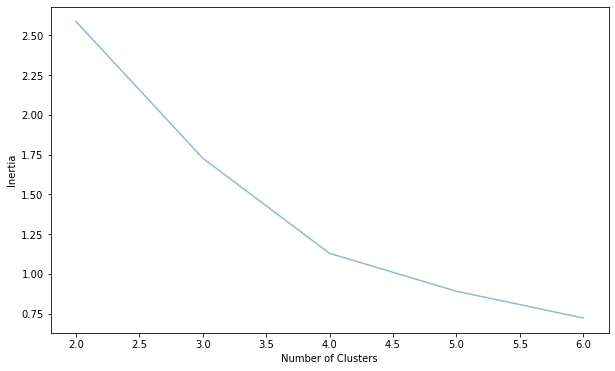

In [105]:
min_range = 2
max_range = 7

inertia = []
k_list = range(min_range, max_range)

for k in k_list:
    km = KMeans(n_clusters = k, random_state= 0)
    km.fit(Feat_scale) 
    score = km.inertia_
    inertia.append(score)


plt.figure(1 , figsize = (10 ,6))
# plt.plot(np.arange(min_range , max_range) , inertia , 'o')
plt.plot(np.arange(min_range , max_range) , inertia , '-' , alpha = 0.5)

plt.xlabel('Number of Clusters') , plt.ylabel('Inertia')
plt.show()

In [106]:
km = KMeans(n_clusters=4, random_state=1234)
km.fit(Feat_scale)
cluster = km.predict(Feat_scale)
X["Cluster_2"] = cluster

In [107]:
for i in range(4):
    print(i,X[X.Cluster_2==i].Province.tolist())
X["Cluster_2"].value_counts()

0 ['Amnat Charoen', 'Ang Thong', 'Bueng Kan', 'Buriram', 'Chai Nat', 'Chaiyaphum', 'Chiang Rai', 'Kalasin', 'Kamphaeng Phet', 'Khon Kaen', 'Lampang', 'Lamphun', 'Loei', 'Lopburi', 'Mae Hong Son', 'Maha Sarakham', 'Mukdahan', 'Nakhon Nayok', 'Nakhon Pathom', 'Nakhon Phanom', 'Nakhon Ratchasima', 'Nakhon Sawan', 'Nan', 'Nong Bua Lamphu', 'Nong Khai', 'Phayao', 'Phetchabun', 'Phichit', 'Phitsanulok', 'Phrae', 'Roi Et', 'Sa Kaeo', 'Sakon Nakhon', 'Samut Songkhram', 'Sing Buri', 'Sisaket', 'Sukhothai', 'Suphan Buri', 'Surin', 'Ubon Ratchathani', 'Udon Thani', 'Uthai Thani', 'Uttaradit', 'Yasothon']
1 ['Bangkok', 'Chonburi', 'Pathum Thani', 'Phang Nga', 'Phuket', 'Ranong', 'Samut Prakan', 'Samut Sakhon']
2 ['Chachoengsao', 'Chanthaburi', 'Chiang Mai', 'Chumphon', 'Kanchanaburi', 'Krabi', 'Nakhon Si Thammarat', 'Nonthaburi', 'Phatthalung', 'Phetchaburi', 'Phra Nakhon Si Ayutthaya', 'Prachinburi', 'Prachuap Khiri Khan', 'Ratchaburi', 'Rayong', 'Saraburi', 'Satun', 'Songkhla', 'Surat Thani', 'T

0    44
2    22
1     8
3     3
Name: Cluster_2, dtype: int64

In [108]:
X.groupby("Cluster_2").mean()

,Avg_Case,Avg_PosTest,Tot_Vac,607_Vac,Level,Cluster_1,PCA_0,PCA_1
Cluster_2,,,,,,,,
0,4.245260,0.059588,0.355518,0.526248,1.727273,0.000000,-0.116123,-0.010019
1,11.790068,0.146505,0.722601,0.743359,2.125000,1.000000,0.195485,0.302539
2,22.893487,0.145542,0.443597,0.557522,1.000000,2.681818,0.106465,-0.036621
3,58.287370,0.382783,0.359523,0.397227,0.000000,2.000000,0.401107,-0.391268


In [109]:
fig = px.scatter(X, x="PCA_0",y="PCA_1",hover_name='Province',color='Cluster_2',title='PCA_plot',color_continuous_scale='Turbo')
fig.show()

In [ ]:
"""
3 < 1 < 2 < 0
0 : Safe
1 : Warned
3 : Caution
3 : Alert

"""

## Rearrange Result 

0 Severe ===> 4 Safe

In [110]:
res = X[['Province','Cluster_1','Cluster_2','Level']]
res.tail(10)

,Province,Cluster_1,Cluster_2,Level
67,Surin,0,0,2
68,Tak,3,2,0
69,Trang,3,2,1
70,Trat,3,2,1
71,Ubon Ratchathani,0,0,1
72,Udon Thani,0,0,1
73,Uthai Thani,0,0,2
74,Uttaradit,0,0,2
75,Yala,2,3,0
76,Yasothon,0,0,2


In [ ]:
"""
Cluster 1 : 2 < 3 < 0 < 1
Cluster 2 : 3 < 1 < 2 < 0
"""
c1_conv = {2:0,3:1,0:2,1:3} 
c2_conv = {3:0,1:1,2:2,0:3} 


In [ ]:
res['Cluster_1'] = res['Cluster_1'].map(c1_conv)
res['Cluster_2'] = res['Cluster_2'].map(c2_conv)
res.tail(10)

<ipython-input-187-e51c658cebae>:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

<ipython-input-187-e51c658cebae>:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



,Province,Cluster_1,Cluster_2,Level
67,Surin,2,3,2
68,Tak,1,1,0
69,Trang,1,1,1
70,Trat,1,1,1
71,Ubon Ratchathani,2,3,1
72,Udon Thani,2,3,1
73,Uthai Thani,2,3,2
74,Uttaradit,2,3,2
75,Yala,0,0,0
76,Yasothon,2,3,2


C:\ProgramData\Anaconda3\lib\site-packages\pandas\plotting\_matplotlib\tools.py:331: MatplotlibDeprecationWarning:


The is_first_col function was deprecated in Matplotlib 3.4 and will be removed two minor releases later. Use ax.get_subplotspec().is_first_col() instead.



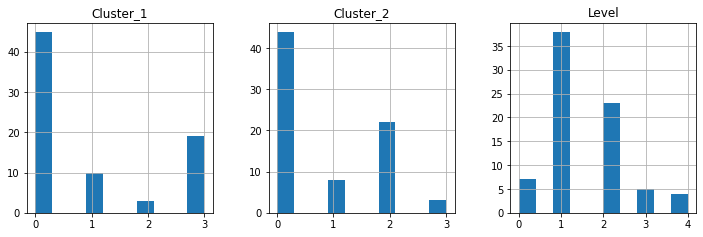

In [111]:
res[['Cluster_1','Cluster_2',	'Level']].hist(layout=(1, 3), figsize=(12, 3.5));

In [ ]:
# res['TooGood'] = (res['Cluster_1']+res['Cluster_2'])/2 >res['Level']
# res['TooGood'].value_counts()

<ipython-input-189-2137e4cbc09e>:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



True     55
False    22
Name: TooGood, dtype: int64

In [ ]:
res.to_csv('Result_KM_CV.csv')


# Advance Visualization 

In [204]:
gdf = gpd.read_file("thailand.json")
# gdf = pd.merge(gdf, res, 'inner', on='Province')
gdf.head()


,Province,geometry
0,Mae Hong Son,"POLYGON ((98.08593 19.77316, 98.11135 19.77714..."
1,Chumphon,"POLYGON ((99.27258 10.95801, 99.27754 10.95902..."
2,Nakhon Si Thammarat,"POLYGON ((100.34246 7.93878, 100.33778 7.93789..."
3,Phuket,"POLYGON ((98.41863 7.90375, 98.42189 7.90843, ..."
4,Phang Nga,"MULTIPOLYGON (((98.53631 8.11514, 98.54054 8.1..."


In [154]:
res


,Province,Cluster_1,Cluster_2,Level
0,Amnat Charoen,0,0,2
1,Ang Thong,0,0,1
2,Bangkok,1,1,4
3,Bueng Kan,0,0,3
4,Buriram,0,0,2
...,...,...,...,...
72,Udon Thani,0,0,1
73,Uthai Thani,0,0,2
74,Uttaradit,0,0,2
75,Yala,2,3,0


In [186]:
asia["features"][0]

{'type': 'Feature',
 'properties': {'scalerank': 1,
  'featurecla': 'Admin-0 country',
  'labelrank': 4,
  'sovereignt': 'United Arab Emirates',
  'sov_a3': 'ARE',
  'adm0_dif': 0,
  'level': 2,
  'type': 'Sovereign country',
  'admin': 'United Arab Emirates',
  'adm0_a3': 'ARE',
  'geou_dif': 0,
  'geounit': 'United Arab Emirates',
  'gu_a3': 'ARE',
  'su_dif': 0,
  'subunit': 'United Arab Emirates',
  'su_a3': 'ARE',
  'brk_diff': 0,
  'name': 'United Arab Emirates',
  'name_long': 'United Arab Emirates',
  'brk_a3': 'ARE',
  'brk_name': 'United Arab Emirates',
  'brk_group': None,
  'abbrev': 'U.A.E.',
  'postal': 'AE',
  'formal_en': 'United Arab Emirates',
  'formal_fr': None,
  'note_adm0': None,
  'note_brk': None,
  'name_sort': 'United Arab Emirates',
  'name_alt': None,
  'mapcolor7': 2,
  'mapcolor8': 1,
  'mapcolor9': 3,
  'mapcolor13': 3,
  'pop_est': 4798491,
  'gdp_md_est': 184300,
  'pop_year': -99,
  'lastcensus': 2010,
  'gdp_year': -99,
  'economy': '6. Developing re

In [205]:
with urlopen('https://gist.githubusercontent.com/hrbrmstr/94bdd47705d05a50f9cf/raw/0ccc6b926e1aa64448e239ac024f04e518d63954/asia.geojson') as response:
    asia = json.load(response)

import plotly.express as px
df = px.data.gapminder().query("year==2007")

fig = px.choropleth(df, geojson=asia,
                    locations='iso_alpha',
                    color='pop',
                    color_continuous_scale="reds",
                    scope = 'asia',
                    featureidkey="properties.sov_a3",
                    labels={'population':'Population Count'},
                    center={"lat": 30, "lon": 100})

fig.show()
# fig.write_html("myplot.html")

In [208]:
res

,Province,Cluster_1,Cluster_2,Level
0,Amnat Charoen,0,0,2
1,Ang Thong,0,0,1
2,Bangkok,1,1,4
3,Bueng Kan,0,0,3
4,Buriram,0,0,2
...,...,...,...,...
72,Udon Thani,0,0,1
73,Uthai Thani,0,0,2
74,Uttaradit,0,0,2
75,Yala,2,3,0


In [212]:
with open('thailand.json') as json_file:
    provinces = json.load(json_file)
# provinces["features"][11]
import plotly.express as px

fig = px.choropleth(res,featureidkey="properties.Province",
                    geojson=provinces,locations='Province',
                    color='Level',
                    scope = 'asia',color_continuous_scale="reds")
# fig.update_geos(fitbounds='location',visible= False)
fig.show()
# pyo.plot(fig)


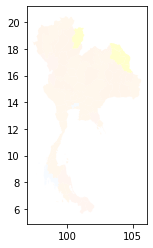

In [129]:
color = {0:'Reds',1:'OrRd',2:'Oranges',3:'YlOrRd',4:'Blues'}
fig, ax = plt.subplots()
ax.set_aspect('equal')
for i in range(5):
    ggdf = gdf[gdf.Level==i]
    # print(ggdf.head(2))
    ggdf.plot(ax=ax,column='Level',figsize=(8,15),cmap=color[i])

<AxesSubplot:>

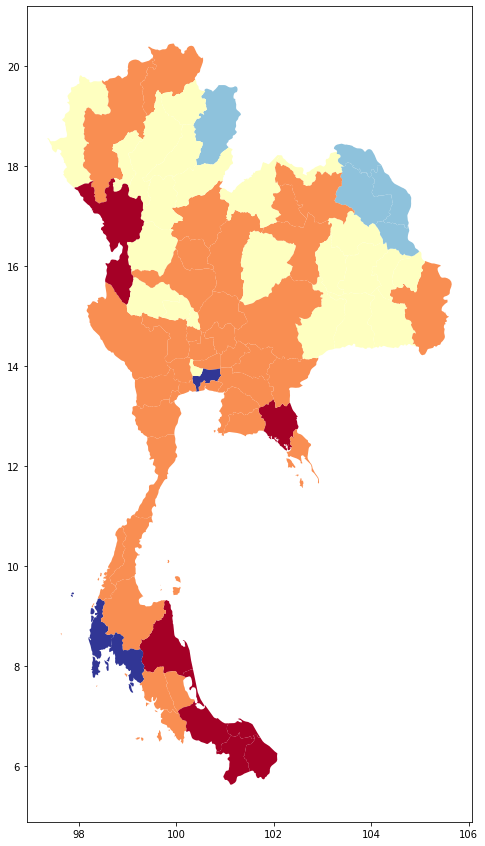

In [164]:
gdf.plot(column='Level',figsize=(8,15),cmap='RdYlBu')

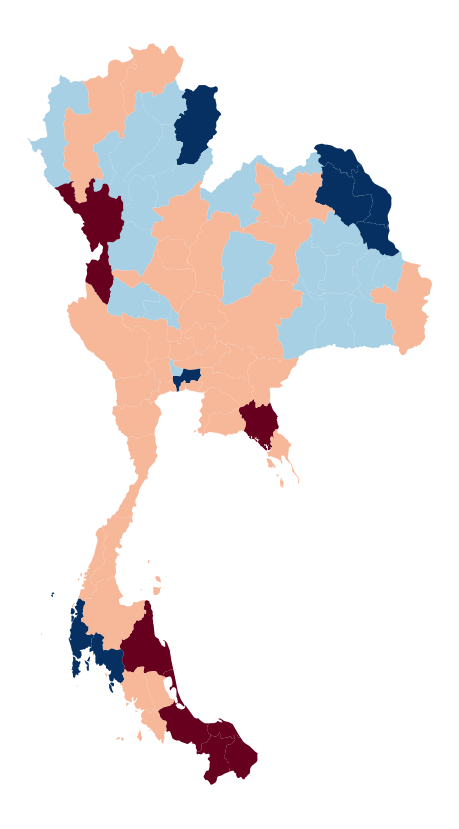

In [167]:
# gdf.plot(column='Level',figsize=(8,15),cmap='RdYlBu')
cmap = plt.get_cmap('RdBu', 4)
ax = gdf.plot(column='Level',figsize=(8,15),cmap=cmap)
ax.set_axis_off()
# ax.colorbar()
plt.show()

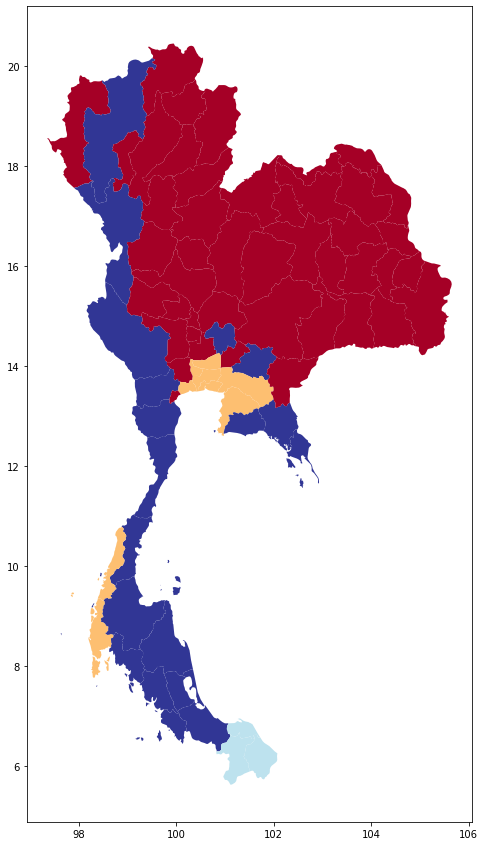

In [117]:
gdf.plot(column='Cluster_1',figsize=(8,15),cmap='RdYlBu')
plt.show()

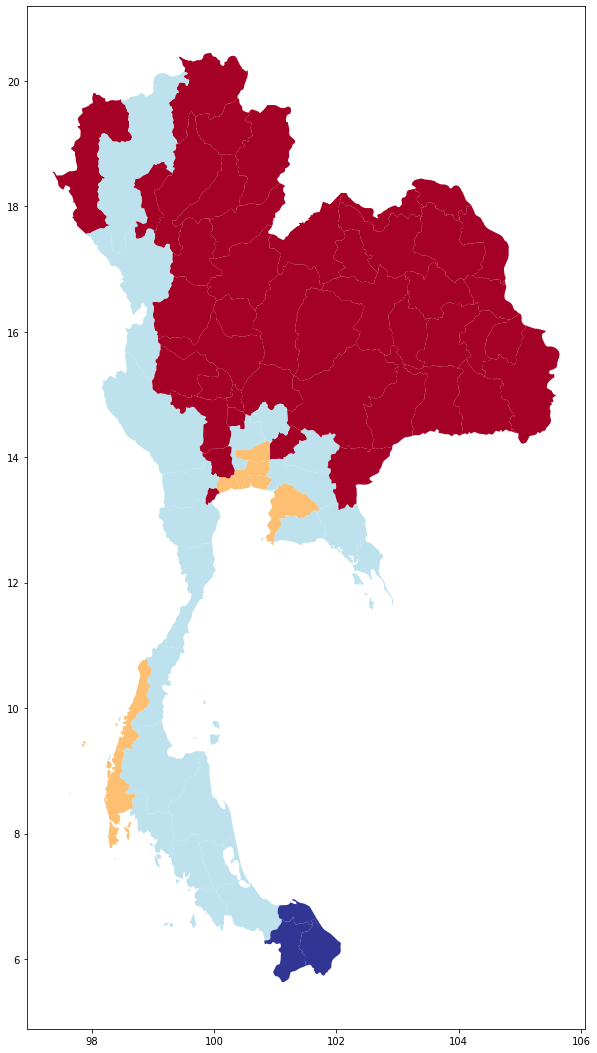

In [115]:
gdf.plot(column='Cluster_2',figsize=(8,15),cmap='RdYlBu')
plt.show()

# Sandbox

## Hierarchical clustering

In [ ]:
from sklearn import preprocessing
from sklearn.cluster import AgglomerativeClustering
import scipy.cluster.hierarchy as sch # draw dendrogram

In [ ]:
Feat = X[['Avg_Case', 'Avg_PosTest', 'Tot_Vac', '607_Vac']]
Feat['Avg_Case'] = Feat['Avg_Case'].div(100)
Feat.head()

In [ ]:
# Consider Feature & Normalize
from sklearn.preprocessing import MaxAbsScaler
# sklearn.preprocessing.normalize(X
z = MaxAbsScaler().fit_transform(mov_avg_case)
plt.scatter(x  =z[:,0] ,y=z[:,1],facecolors='black',alpha=.55, s=100)
plt.xlabel("case_14avg")
plt.ylabel("case_7avg")
plt.title("case_14avg v.case_7avg")
plt.show
# case_7avg.max(),case_14avg.max()

In [ ]:
fig, ax=plt.subplots(figsize=(20, 7))
dg=sch.dendrogram(sch.linkage(Feat, method='ward'), ax=ax, labels=X['Province'].values)

## Severe Case

In [ ]:
HSP_Severe = dict(zip(df[df.Date==set_date_str]['Province'],df[df.Date==set_date_str]['Hospitalized Severe']))
HSP_Severe =  {p: v/prov_tot_pop[p]*100000 for p, v in HSP_Severe.items()}
len(HSP_Severe)
HSP_Severe

## Time Series

In [ ]:
## Last 14 Day
print(f"Shape should be {77*10}")
cases_df = df.loc[(df['Date_Minus'] < 10) & (df['Date_Minus'] >= 0)][['Province','Date_Minus','Cal_Cases','Rel_Cases']]
cases_df

In [ ]:
res = []
for d in range(13,-1,-1):
# for p in province:
    # timeline = {'Province':p}
    timeline = {'Date_Minus':-d}
    timeline.update(dict(zip(cases_df[cases_df.Date_Minus==d].Province,cases_df[cases_df.Date_Minus==d].Rel_Cases)) ) 
    res.append(timeline)
province_timeline_case = pd.DataFrame(res)
province_timeline_case.set_index('Date_Minus',inplace =True)
province_timeline_case


In [ ]:
# Normalization
province_timeline_case.max().max()  # 128.46

In [ ]:
max_rel_case = 150
province_timeline_case = province_timeline_case.div(max_rel_case)

In [ ]:
province_timeline_case.plot().legend(loc='center left', bbox_to_anchor=(1, 0.5))
# Top 7 populated
province_timeline_case[['Bangkok','Nakhon Ratchasima','Chonburi','Samut Prakan','Ubon Ratchathani','Khon Kaen','Chiang Mai']].plot().legend(loc='center left', bbox_to_anchor=(1, 0.5))
# Top 7 Cases
province_timeline_case[['Bangkok', 'Pattani', 'Nakhon Si Thammarat', 'Songkhla', 'Khon Kaen', 'Trang','Surin']].plot().legend(loc='center left', bbox_to_anchor=(1, 0.5))
# Top 7 7Average
province_timeline_case[case_7avg.nlargest(7).index.tolist()].plot().legend(loc='center left', bbox_to_anchor=(1, 0.5))

## TSLEARN

In [ ]:
>>> from tslearn.generators import random_walks
>>> X = random_walks(n_ts=50, sz=32, d=1)
>>> km = TimeSeriesKMeans(n_clusters=3, metric="euclidean", max_iter=5,
...                       random_state=0).fit(X)
>>> km.cluster_centers_.shape
(3, 32, 1)
>>> km_dba = TimeSeriesKMeans(n_clusters=3, metric="dtw", max_iter=5,
...                           max_iter_barycenter=5,
...                           random_state=0).fit(X)
>>> km_dba.cluster_centers_.shape
(3, 32, 1)
>>> km_sdtw = TimeSeriesKMeans(n_clusters=3, metric="softdtw", max_iter=5,
...                            max_iter_barycenter=5,
...                            metric_params={"gamma": .5},
...                            random_state=0).fit(X)
>>> km_sdtw.cluster_centers_.shape
(3, 32, 1)
>>> X_bis = to_time_series_dataset([[1, 2, 3, 4],
...                                 [1, 2, 3],
...                                 [2, 5, 6, 7, 8, 9]])
>>> km = TimeSeriesKMeans(n_clusters=2, max_iter=5,
...                       metric="dtw", random_state=0).fit(X_bis)
>>> km.cluster_centers_.shape

## The Researcher COVID data

In [ ]:
def get_population(json_data):
    population = {}
    for province in json_data:        
        population[province['province']] = province['population']
    return population

def json_load(fname):
    with open(fname, encoding='utf-8') as json_file:
        return json.load(json_file)

def json_dump(json_data,fname):
    with open(fname, "w+", encoding="utf-8") as fout:
        json.dump(json_data, fout, ensure_ascii=False, indent=2)

def get_vaccines(json_data):
    return {province["province"]: province for province in json_data['data']}

def get_cases(json_data):
    return {province["name"]: province['cases'] for province in json_data}

In [ ]:
## 

vaccines_data = requests.get("https://raw.githubusercontent.com/wiki/porames/the-researcher-covid-data/vaccination/provincial-vaccination.json")
vaccines = get_vaccines(vaccines_data.json())
provinces = list(vaccines.keys())
"""
vaccines= > Dict 
Ex.
'กระบี่': {'province': 'กระบี่',
  'over_60_1st_dose': 42114,
  'total_1st_dose': 326038,
  'total_2nd_dose': 218407,
  'total_3rd_dose': 21013},
"""
len(vaccines)
vaccines['กระบี่']
####################
population_data = json_load("province-population-data.json")
populations = get_population(population_data)
"""
populations= > Dict 
Ex. 
'กรุงเทพมหานคร': 7699175,
"""
len(populations),[p for p in provinces if p not in populations]
####################
cases_data = requests.get('https://raw.githubusercontent.com/wiki/porames/the-researcher-covid-data/cases/province-cases-data-14days.json')
cases_data = cases_data.json()
# List 
cases = get_cases(cases_data)
"""
cases= > Dict 
{'กระบี่': {'2021-10-21T00:00:00': 88,
  '2021-10-22T00:00:00': 91,
  '2021-10-23T00:00:00': 100,
"""
len(cases),[p for p in provinces if p not in cases]



## Plotly choropleth_mapbox

In [ ]:
import plotly.express as px

fig = px.choropleth_mapbox(df, geojson=counties, locations='fips', color='unemp',
                           color_continuous_scale="Viridis",
                           range_color=(0, 12),
                           mapbox_style="carto-positron",
                           zoom=3, center = {"lat": 37.0902, "lon": -95.7129},
                           opacity=0.5,
                           labels={'unemp':'unemployment rate'}
                          )
fig.update_layout(margin={"r":0,"t":0,"l":0,"b":0})
fig.show()